In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

In [8]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

y = 0, it's a 'non-cat' picture.


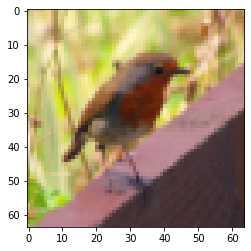

In [9]:
index =10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[0, index]) + ", it's a '" + classes[np.squeeze(train_set_y[:, index])].decode("utf-8") +  "' picture.")

In [14]:
m_train = train_set_x_orig.shape[0]
m_test = test_set_x_orig.shape[0]
num_px = train_set_x_orig.shape[1]
print("m_train", m_train)
print("m_test", m_test)
print("num_px", num_px)
print("shape of pic", train_set_x_orig.shape)

m_train 209
m_test 50
num_px 64
shape of pic (209, 64, 64, 3)


In [17]:
train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[1] *
                                               train_set_x_orig.shape[2] *
                                               train_set_x_orig.shape[3], 
                                               m_train)
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[1] *
                                               test_set_x_orig.shape[2] *
                                               test_set_x_orig.shape[3], 
                                               m_test)

print("train_set_x_flatten shape", train_set_x_flatten.shape)
print("test_set_x_flatten shape", test_set_x_flatten.shape)


train_set_x_flatten shape (12288, 209)
test_set_x_flatten shape (12288, 50)


In [20]:
train_set_x = train_set_x_flatten / 255.0
test_set_x = test_set_x_flatten / 255.0


In [21]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [24]:
# Initializing parameters
def initialize_with_zeros(dim):
  w = np.zeros((dim, 1))
  b = 0
  assert(w.shape == (dim, 1))
  assert(isinstance(b, float) or isinstance(b, int))

  return w, b

dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [31]:
# Forward and Backward propagation
def propagate(w, b, X, y):
  m = X.shape[1]
  # w : n * 1 X : n * m y = 1 * m
  A = sigmoid(np.dot(w.T, X) + b) # 1 * m
  cost = -1.0 / m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

  dw = np.dot(X, (A - y).T) / m # n * 1
  db = np.sum(A - y) / m

  grads = {"dw" : dw, "db" : db}

  return grads, cost
# test
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


w = [[-0.08608643]
 [ 0.10971233]]
b = -0.1442742664803268
dw = [[0.12311093]
 [0.13629247]]
db = -0.14923915884638048


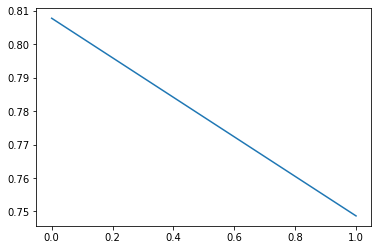

In [42]:
# 优化
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
  costs = []

  for iter in range(num_iterations):
    grads, cost = propagate(w, b, X, Y)

    dw = grads["dw"]
    db = grads["db"]

    w = w - learning_rate * dw
    b = b - learning_rate * db
    if (iter % 50 == 0):
      costs.append(cost)

  params = {"w": w,
          "b": b}

  grads = {"dw": dw,
          "db": db}

  return params, grads, costs

params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)
print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

import matplotlib.pyplot as plt
plt.plot(costs)

In [43]:
def predict(w, b, X):
  m = X.shape[1]
  y_prediction = np.zeros((1, m))
  w = w.reshape(X.shape[0], 1)
  A = sigmoid(np.dot(w.T, X) + b)

  y_prediction = (A >= 0.5) * 1.0
  assert(y_prediction.shape == (1, m))

  return y_prediction

# test
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [44]:
# Merge all functions into a model
def model(X_train, Y_train, X_test, Y_test, num_iterations = 2000, learning_rate = 0.5, print_cost = False):
  w, b = initialize_with_zeros(X_train.shape[0])

  parameters, gradients, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)

  # retrieve paramters
  w = parameters["w"]
  b = parameters["b"]

  # predict on train/test examples
  Y_prediction_test = predict(w, b, X_test)
  Y_prediction_train = predict(w, b, X_train)

  # Print train/test Errors
  print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
  print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

  
  d = {"costs": costs,
        "Y_prediction_test": Y_prediction_test, 
        "Y_prediction_train" : Y_prediction_train, 
        "w" : w, 
        "b" : b,
        "learning_rate" : learning_rate,
        "num_iterations": num_iterations}

  return d

In [45]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2000, learning_rate = 0.005, print_cost = False)

train accuracy: 91.38755980861244 %
test accuracy: 34.0 %


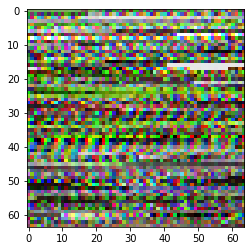

In [46]:
# Example of a picture that was wrongly classified.
index = 25
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))

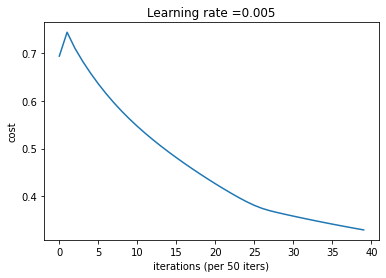

In [48]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per 50 iters)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()